- Jose Luis González Rodríguez
- Enrique González Rodríguez
- Francisco Javier Díaz Andreu

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Descargamos la serie temporal
df = pd.read_csv('StackOverflow.csv',sep=',')
#df = pd.read_csv('C:/Users/Quique/Documents/CUNEF/QUINTO/Análisis Predictivo/StackOverflow.csv',sep=',')
df = df[['month','matlab']]
df['month'] = pd.to_datetime(df['month'], format='%y-%b')
df = df.set_index('month')
df

,matlab
month,
2009-01-01,19
2009-02-01,27
2009-03-01,24
2009-04-01,32
2009-05-01,42
...,...
2019-08-01,371
2019-09-01,362
2019-10-01,523


Graficamos la SERIE TEMPORAL

Text(0.5, 0, 'Fecha')

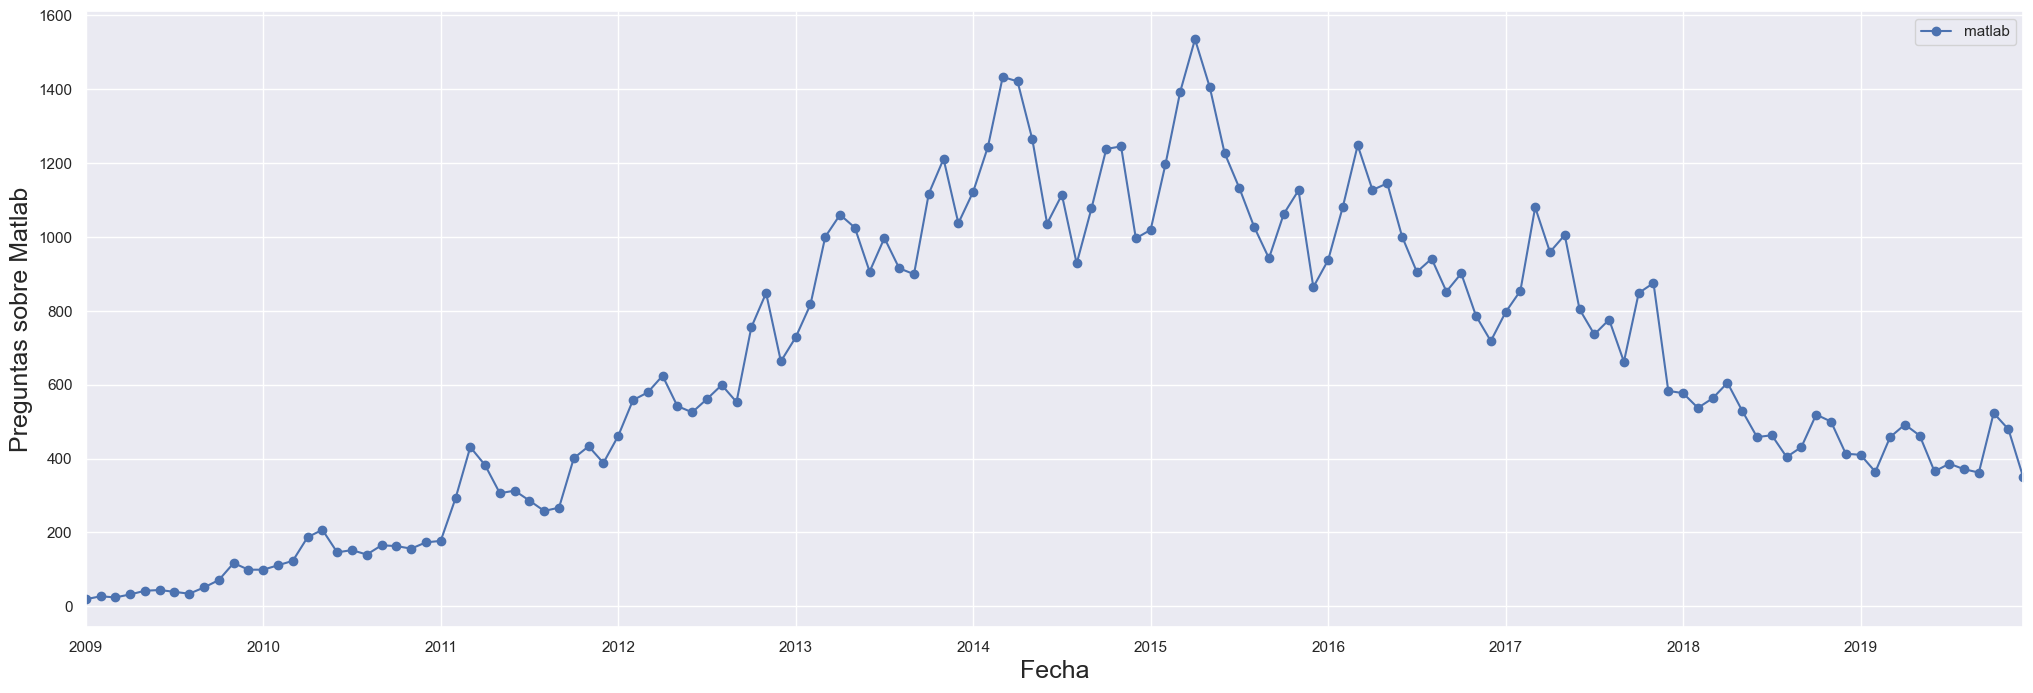

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25, 8)})
ax = df.plot(marker='o', linestyle='-')
ax.set_ylabel('Preguntas sobre Matlab',fontsize=18)
ax.set_xlabel('Fecha',fontsize=18)

Estudiamos la ESTACIONALIDAD de la serie temporal

In [9]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional Frecuencia Mensual')

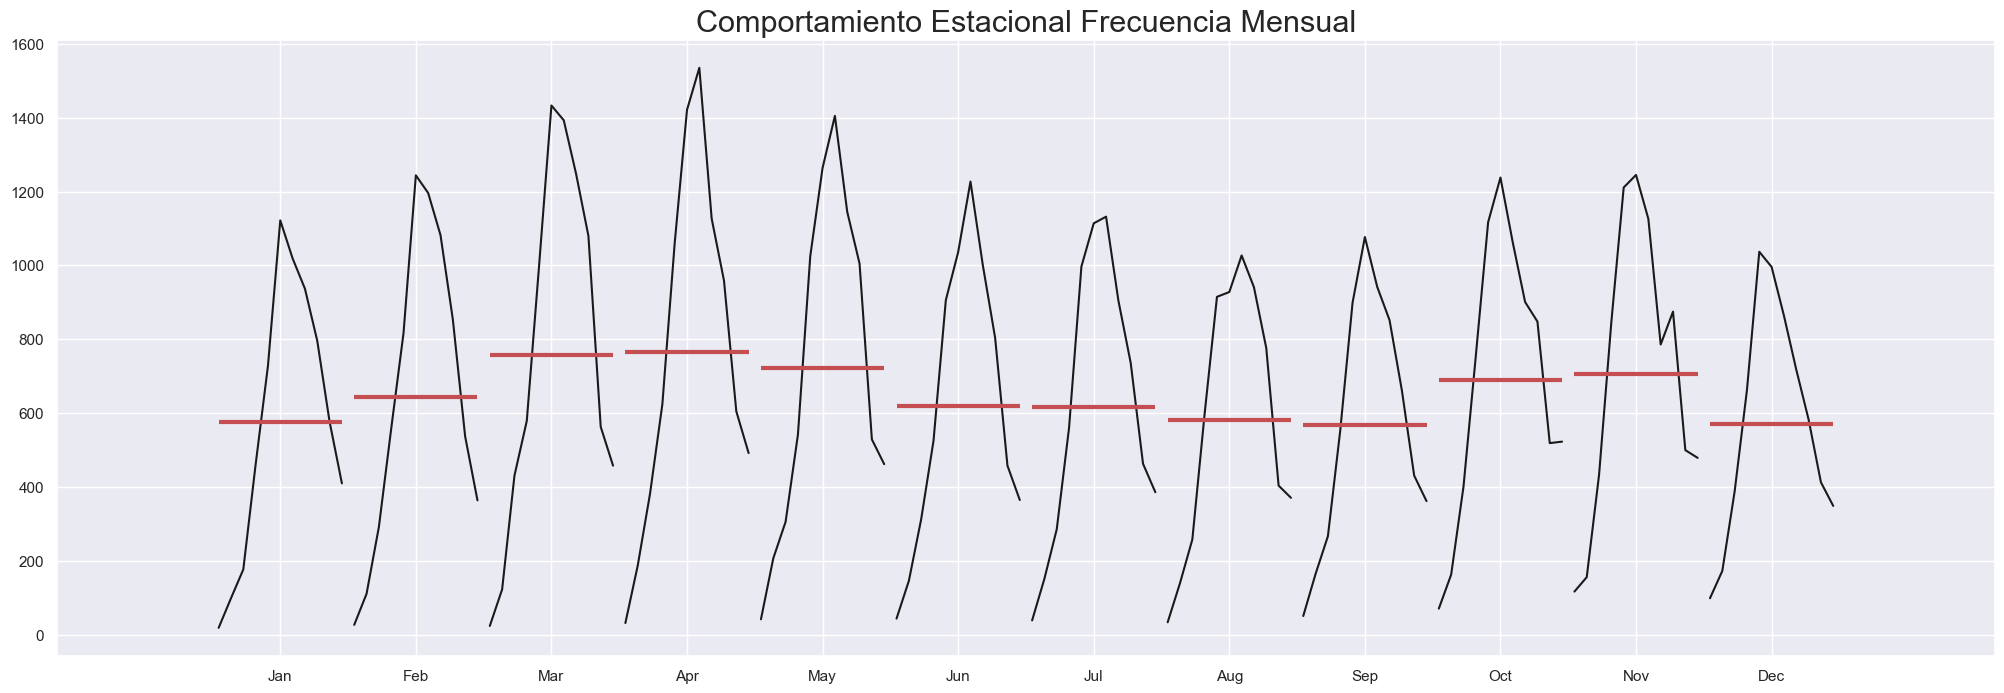

In [10]:
ax = plt.gca()
sm.graphics.tsa.month_plot(df['matlab'],ax=ax)
ax.set_title('Comportamiento Estacional Frecuencia Mensual',fontsize=22)

Text(0.5, 1.0, 'Comportamiento Estacional frecuencia Trimestral')

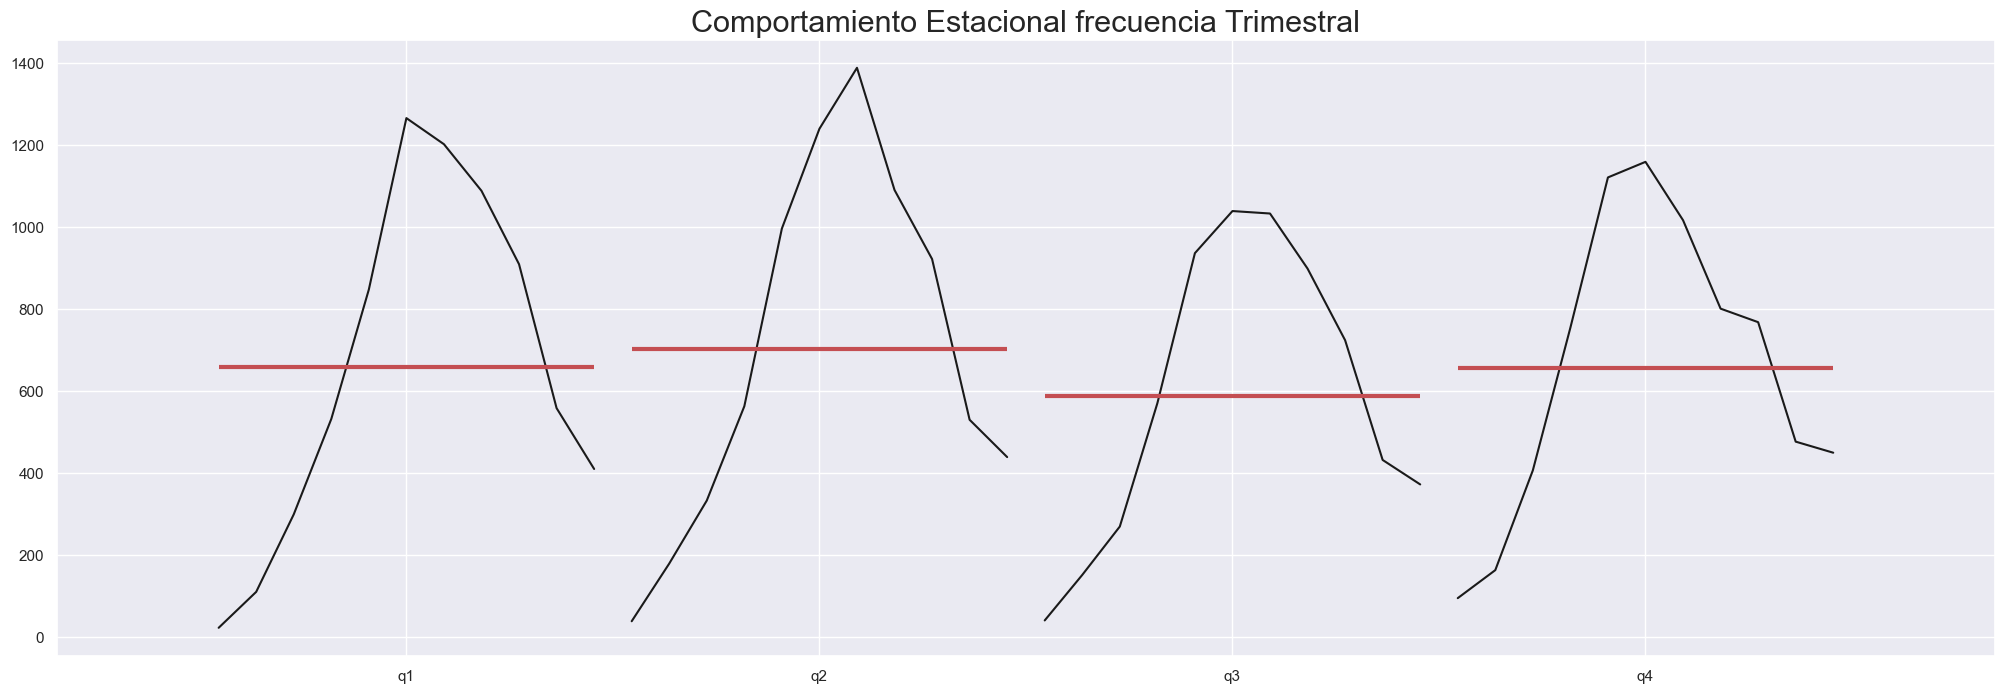

In [11]:
df_Q=df.resample("q").mean()
ax = plt.gca()
sm.graphics.tsa.quarter_plot(df_Q['matlab'],ax=ax)
ax.set_title('Comportamiento Estacional frecuencia Trimestral' ,fontsize=22)

Al observar los gráficos en los que se representan la media de pregutnas en frecuencia mensual y trimestral, podemos conlcuir que no observamos indicios de una estacionalidad muy señalada en la serie temporal.

Estudiamos la ESTACIONARIEDAD de la serie temporal

In [12]:
media_trimestral = df['matlab'].resample('Q').mean()

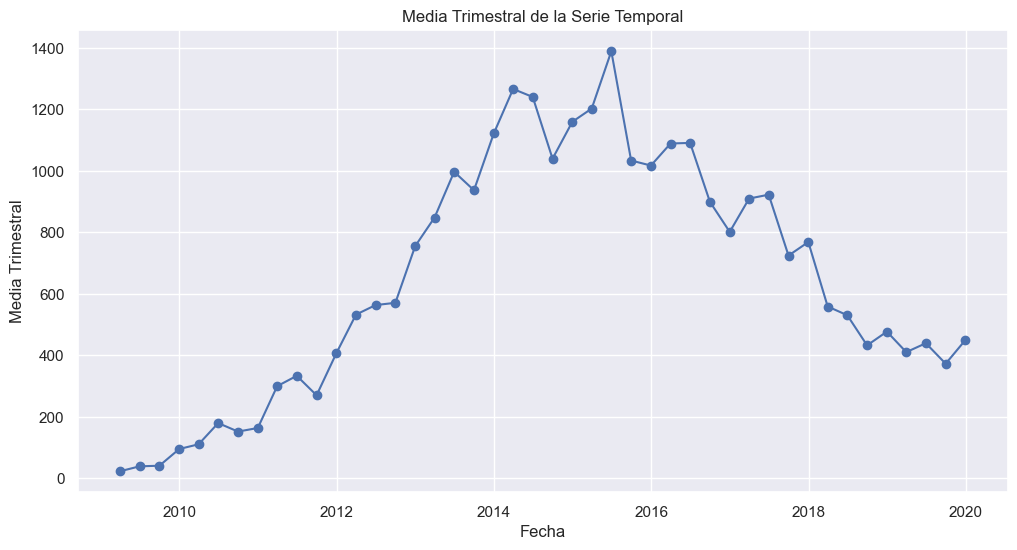

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(media_trimestral, marker='o', linestyle='-')
plt.title('Media Trimestral de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Media Trimestral')
plt.grid(True)
plt.show()

In [14]:
varianza_trimestral = df['matlab'].resample('Q').var()

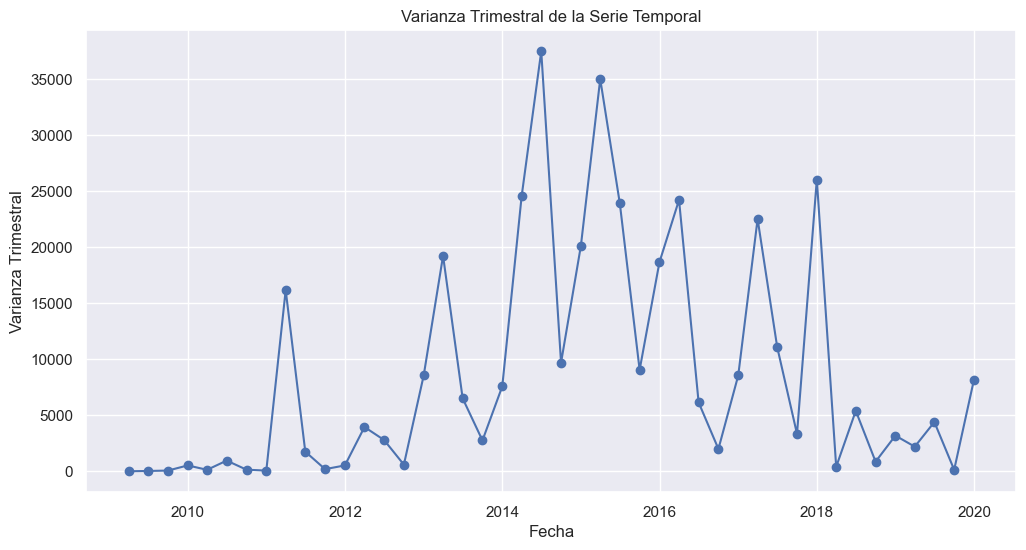

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(varianza_trimestral, marker='o', linestyle='-')
plt.title('Varianza Trimestral de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Varianza Trimestral')
plt.grid(True)
plt.show()

Observando los dos gráficos anteriores, podemos concluir que no estamos ante una serie estacionaria debido a los siguientes factores:
- Muestra una clara tendencia ascendente hasta 2016, donde tiene su máximo de preguntas, y posteriormente caen el numero de preguntas progesivamente. Esto le provoca que no tenga una media constante a lo largo del tiempo.
- Muestra una varianza no constante a lo largo de la serie temporal.

In [16]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

In [17]:
def temporal_train_validation_split(y, validation_size):
    # Calcula el índice de división
    split_index = len(y) - validation_size

    # Divide la serie en conjuntos de entrenamiento y validación
    y_train = y[:split_index]
    y_validation = y[split_index:]

    return y_train, y_validation

In [18]:
y_traincomp, y_test = temporal_train_test_split(y =df["matlab"].astype("float64").to_period("M"), test_size=6)

In [19]:
y_train, y_validation = temporal_train_validation_split(y=y_traincomp, validation_size=12)

La muestra queda dividida en 4 series distintas:
- y_traincom:  2009.01 - 2019.06
- y_test: 2019.07 - 2019.12
- y_train: 2009.01 - 2018.06
- y_validation: 2018.07 - 2019.06

In [20]:
y_train

month
2009-01     19.0
2009-02     27.0
2009-03     24.0
2009-04     32.0
2009-05     42.0
           ...  
2018-02    537.0
2018-03    563.0
2018-04    605.0
2018-05    529.0
2018-06    458.0
Freq: M, Name: matlab, Length: 114, dtype: float64

In [21]:
y_validation

month
2018-07    463.0
2018-08    404.0
2018-09    431.0
2018-10    519.0
2018-11    500.0
2018-12    413.0
2019-01    410.0
2019-02    364.0
2019-03    458.0
2019-04    492.0
2019-05    462.0
2019-06    365.0
Freq: M, Name: matlab, dtype: float64

<Figure size 2000x800 with 0 Axes>

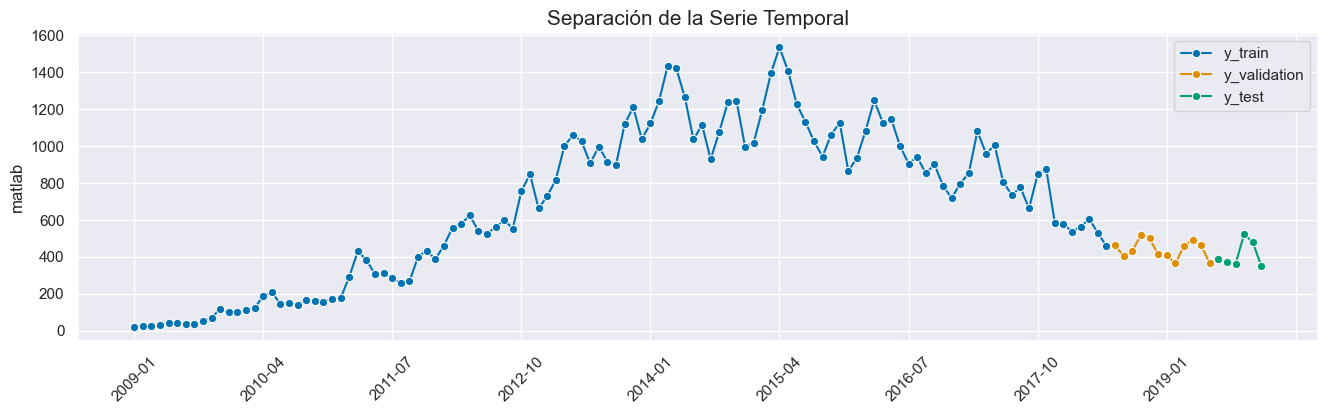

In [22]:
plt.figure(figsize=(20, 8))
plot_series(y_train,y_validation, y_test, labels=["y_train", "y_validation","y_test"])
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Separación de la Serie Temporal", fontsize=15)
plt.show()

PREDICCIÓN DE LA SERIE TEMPORAL CON MODELO ETS

In [23]:
from sktime.forecasting.ets import AutoETS

In [24]:
#Especificamos el horizonte de predicción
fh = np.arange(1, 13)

#Especificamos el algortimo
ETS_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

In [25]:
ETS_auto_model.fit(y_train)

AutoETS(auto=True, n_jobs=-1, sp=4)

In [26]:
print(ETS_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:                 matlab   No. Observations:                  114
Model:                       ETS(MAM)   Log Likelihood                -655.564
Date:                Mon, 06 Nov 2023   AIC                           1331.128
Time:                        12:36:27   BIC                           1358.490
Sample:                    01-31-2009   HQIC                          1342.233
                         - 06-30-2018   Scale                            0.025
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.112      8.944      0.000       0.781       1.219
smoothing_trend     9.999e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [27]:
#Predicciones MODELO ETS
ETS_pred = ETS_auto_model.predict(fh)
print(ETS_pred)

2018-07    486.621884
2018-08    458.720546
2018-09    455.623290
2018-10    493.297116
2018-11    523.403436
2018-12    492.750126
2019-01    488.807670
2019-02    528.582899
2019-03    560.184988
2019-04    526.779707
2019-05    521.992049
2019-06    563.868682
Freq: M, Name: matlab, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='matlab'>)

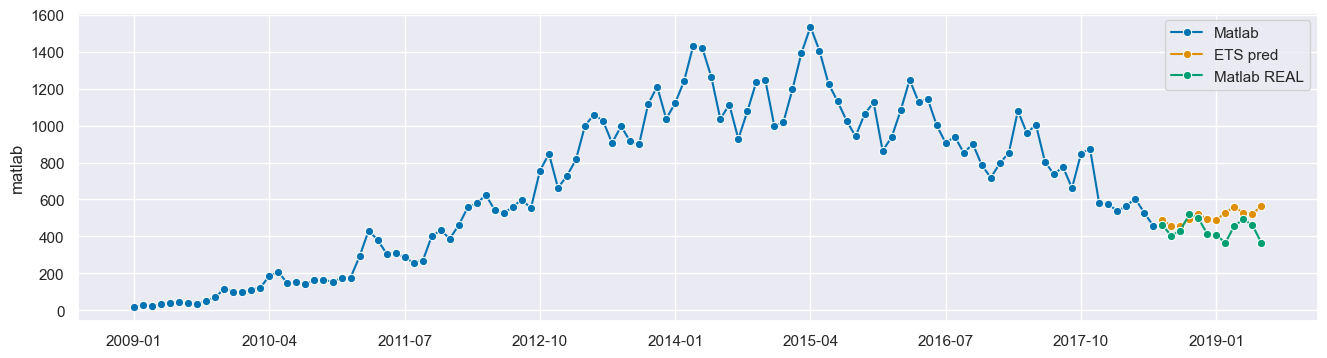

In [28]:
#GRAFICAMOS EL TRAIN, LA PREDICCIÓN Y LA VALIDACIÓN
plot_series(y_train, ETS_pred,y_validation, labels=["Matlab", "ETS pred", "Matlab REAL"])

In [29]:
#MAPE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_validation, ETS_pred[0:12])

0.17882433856292268

In [30]:
#MSE
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_validation, ETS_pred[0:12])

8318.704815275887

In [31]:
#RMSE
rmse = MeanSquaredError(square_root=True)
rmse(y_validation, ETS_pred[0:12])

91.20693403067492

In [32]:
#Especificamos el horizonte de predicción
fh = np.arange(1, 7)

#Especificamos el algortimo
ETS_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

In [33]:
ETS_auto_model.fit(y_traincomp)

AutoETS(auto=True, n_jobs=-1, sp=4)

In [34]:
#Predicciones MODELO ETS
ETS_pred = ETS_auto_model.predict(fh)
print(ETS_pred)

2019-07    391.011335
2019-08    370.378595
2019-09    370.101370
2019-10    399.994331
2019-11    427.608325
2019-12    404.251851
Freq: M, Name: matlab, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='matlab'>)

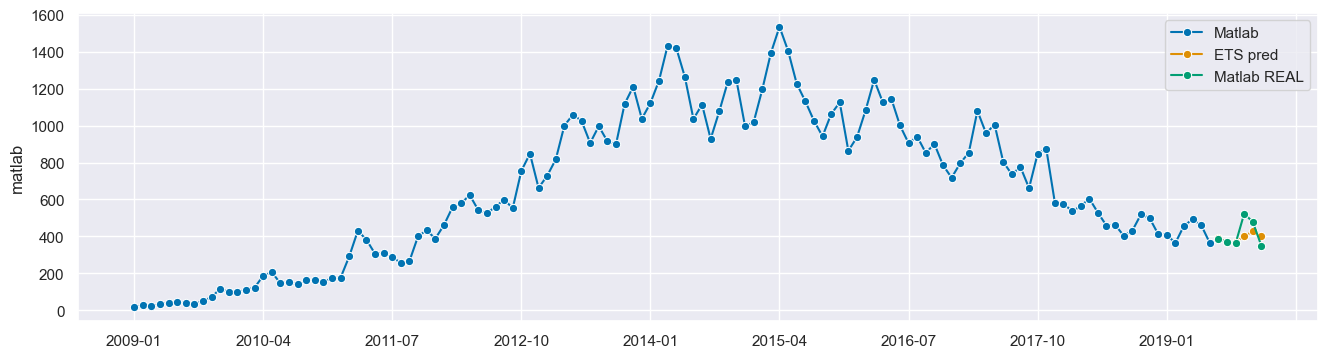

In [35]:
#GRAFICAMOS EL TRAIN, LA PREDICCIÓN Y LA VALIDACIÓN
plot_series(y_traincomp, ETS_pred,y_test, labels=["Matlab", "ETS pred", "Matlab REAL"])

In [36]:
#MAPE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, ETS_pred[0:6])

0.0896389843634736

In [37]:
#MSE
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, ETS_pred[0:6])

3485.899599133842

In [38]:
#RMSE
rmse = MeanSquaredError(square_root=True)
rmse(y_test, ETS_pred[0:12])

59.041507425995164

PREDICCIÓN DE LA SERIE TEMPORAL CON EL MODELO ARIMA

In [39]:
# Aplicamos la transformación logaritmica para estabilizar la varianza buscando la homocedasticidad.
from sktime.transformations.series.boxcox import LogTransformer
transformer = LogTransformer()
log_train= transformer.fit_transform(y_train)
log_train_comp = transformer.fit_transform(y_traincomp)

In [40]:
#Especificamos el horizonte de predicción
fh = np.arange(1, 13)

In [41]:
fh_6 = np.arange(1, 7)

In [42]:
from sktime.forecasting.arima import AutoARIMA

In [43]:
#Especificamos el algortimo
forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_train)

AutoARIMA(sp=4, suppress_warnings=True)

In [44]:
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(3, 2, 2)x(2, 0, [], 4)   Log Likelihood                  57.969
Date:                            Mon, 06 Nov 2023   AIC                            -97.938
Time:                                    12:36:37   BIC                            -73.472
Sample:                                01-31-2009   HQIC                           -88.011
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0130      0.005     -2.693      0.007      -0.022      -0.004
ar.L1         -0.8492      0.096   

In [45]:
#Predicciones MODELO ARIMA LOGARITMICO
log_ARIMA_pred = forecaster.predict(fh)
log_ARIMA_pred

2018-07    6.088467
2018-08    6.098473
2018-09    6.000152
2018-10    6.051982
2018-11    6.009090
2018-12    5.799215
2019-01    5.760750
2019-02    5.675165
2019-03    5.640433
2019-04    5.633131
2019-05    5.532725
2019-06    5.413554
Freq: M, Name: matlab, dtype: float64

In [46]:
#Predicciones MODELO ARIMA CON SERIE ORIGINAL
np.exp(log_ARIMA_pred)

2018-07    440.745299
2018-08    445.177432
2018-09    403.489945
2018-10    424.954539
2018-11    407.112781
2018-12    330.040410
2019-01    317.586515
2019-02    291.536368
2019-03    281.584691
2019-04    279.535981
2019-05    252.831976
2019-06    224.427724
Freq: M, Name: matlab, dtype: float64

In [47]:
#MAPE
mean_absolute_percentage_error(y_validation, np.exp(log_ARIMA_pred))

0.23842015336374436

In [48]:
#MSE
mse = MeanSquaredError()
mse(y_validation, np.exp(log_ARIMA_pred))

15072.409251823889

In [49]:
#RMSE
rmse = MeanSquaredError(square_root=True)
rmse(y_validation, np.exp(log_ARIMA_pred))

122.76974078258816

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='matlab'>)

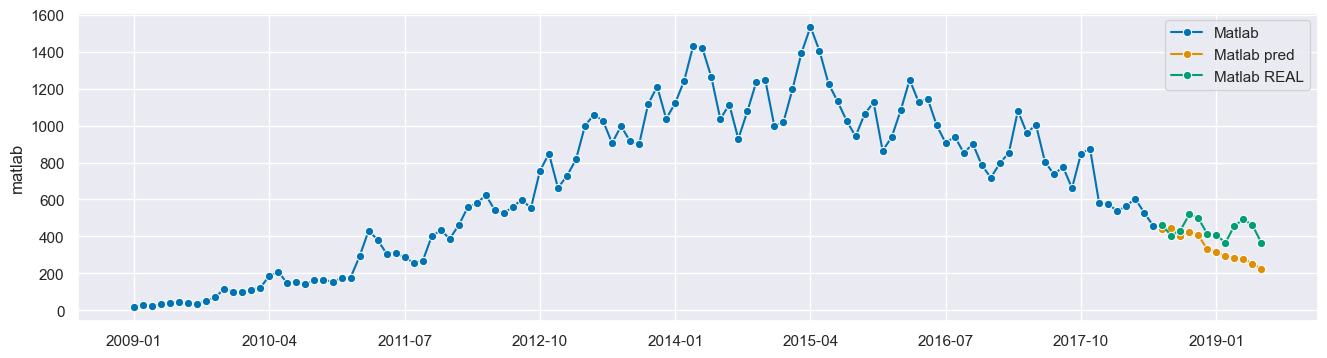

In [50]:
#GRAFICAMOS EL TRAIN, LA PREDICCIÓN Y LA VALIDACIÓN
plot_series(y_train, np.exp(log_ARIMA_pred),y_validation, labels=["Matlab", "Matlab pred", "Matlab REAL"])

In [51]:
#Especificamos el algortimo
forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_train_comp)

AutoARIMA(sp=4, suppress_warnings=True)

In [52]:
#Predicciones MODELO ARIMA LOGARITMICO
log_ARIMA2_pred = forecaster.predict(fh_6)
log_ARIMA2_pred

2019-07    5.755015
2019-08    5.746850
2019-09    5.665000
2019-10    5.692775
2019-11    5.588899
2019-12    5.393891
Freq: M, Name: matlab, dtype: float64

In [53]:
#Predicciones MODELO ARIMA CON SERIE ORIGINAL
np.exp(log_ARIMA2_pred)

2019-07    315.770140
2019-08    313.202378
2019-09    288.588070
2019-10    296.715754
2019-11    267.441034
2019-12    220.057943
Freq: M, Name: matlab, dtype: float64

In [54]:
#MAPE
mean_absolute_percentage_error(y_test, np.exp(log_ARIMA_pred))

0.23842015336374436

In [55]:
#MSE
mse = MeanSquaredError()
mse(y_test, np.exp(log_ARIMA_pred))

15072.409251823889

In [56]:
#RMSE
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_ARIMA_pred))

122.76974078258816

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='matlab'>)

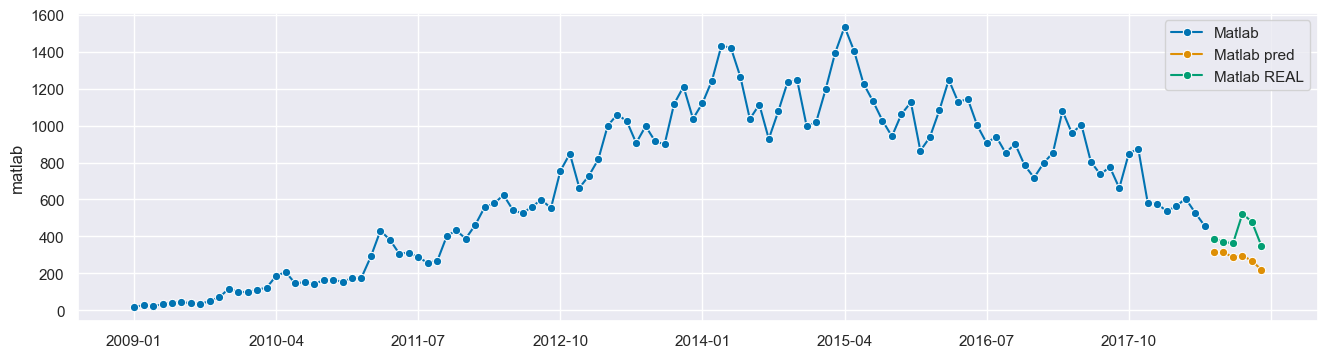

In [57]:
#GRAFICAMOS EL TRAIN, LA PREDICCIÓN Y EL TEST
plot_series(y_train, np.exp(log_ARIMA2_pred),y_test, labels=["Matlab", "Matlab pred", "Matlab REAL"])

PREDICCIÓN DE LA SERIE TEMPORAL CON EL MODELO 4THETA

In [58]:
from darts import TimeSeries
df_t = TimeSeries.from_series(df)

In [59]:
traincomp, test = df_t.split_before(pd.Timestamp("20190701"))

In [60]:
train, validation = traincomp.split_before(pd.Timestamp("20180701"))

In [62]:
from darts.models import Theta, FourTheta
from darts.metrics import mape

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [64]:
from darts.utils.utils import ModelMode, SeasonalityMode, TrendMode
model =Theta(seasonality_period=12,season_mode=SeasonalityMode.ADDITIVE) # Supone Theta 2
model.fit(train)
forecast = model.predict(len(validation))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(validation, forecast)))

model Theta(seasonality_period=12, season_mode=SeasonalityMode.ADDITIVE) obtains MAPE: 19.23%


In [65]:
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta,seasonality_period=12,season_mode=SeasonalityMode.ADDITIVE)
    model.fit(train)
    pred_theta = model.predict(len(validation))
    res = mape(validation, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [66]:
best_mape

9.215199188596179

In [67]:
thetas

array([12.        , 11.59183673, 11.18367347, 10.7755102 , 10.36734694,
        9.95918367,  9.55102041,  9.14285714,  8.73469388,  8.32653061,
        7.91836735,  7.51020408,  7.10204082,  6.69387755,  6.28571429,
        5.87755102,  5.46938776,  5.06122449,  4.65306122,  4.24489796,
        3.83673469,  3.42857143,  3.02040816,  2.6122449 ,  2.20408163,
        1.79591837,  1.3877551 ,  0.97959184,  0.57142857,  0.16326531,
       -0.24489796, -0.65306122, -1.06122449, -1.46938776, -1.87755102,
       -2.28571429, -2.69387755, -3.10204082, -3.51020408, -3.91836735,
       -4.32653061, -4.73469388, -5.14285714, -5.55102041, -5.95918367,
       -6.36734694, -6.7755102 , -7.18367347, -7.59183673, -8.        ])

In [68]:
best_theta

0.5714285714285712

In [69]:
best_theta_model = Theta(theta=best_theta,seasonality_period=12,season_mode=SeasonalityMode.ADDITIVE)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(validation))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(validation, pred_best_theta), best_theta
    )
)


The MAPE is: 9.22, with theta = 0.5714285714285712.


<Axes: xlabel='month'>

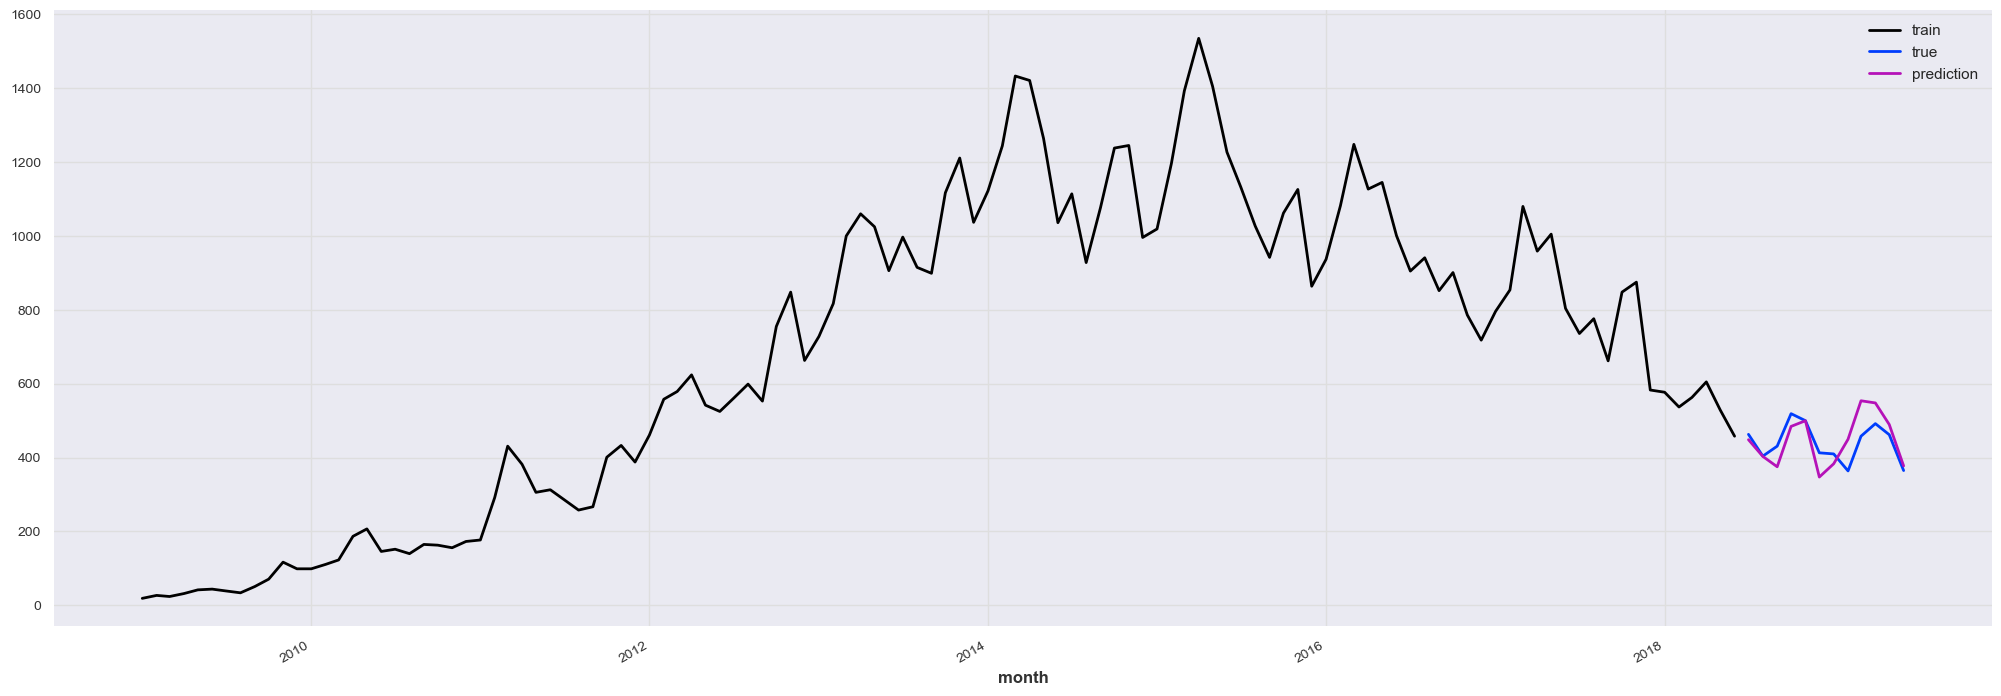

In [70]:
train.plot(label="train")
validation.plot(label="true")
pred_best_theta.plot(label="prediction")

In [71]:
from darts.utils.utils import ModelMode, SeasonalityMode, TrendMode
model =Theta(seasonality_period=12,season_mode=SeasonalityMode.ADDITIVE) # Supone Theta 2
model.fit(traincomp)
forecast = model.predict(len(test))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(test, forecast)))

model Theta(seasonality_period=12, season_mode=SeasonalityMode.ADDITIVE) obtains MAPE: 14.73%


In [72]:
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta,seasonality_period=12,season_mode=SeasonalityMode.ADDITIVE)
    model.fit(traincomp)
    pred_theta = model.predict(len(test))
    res = mape(test, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [73]:
best_mape

7.528014703553694

In [74]:
best_theta

-0.6530612244897966

In [75]:
best_theta_model = Theta(theta=best_theta,seasonality_period=12,season_mode=SeasonalityMode.ADDITIVE)
best_theta_model.fit(traincomp)
pred_best_theta = best_theta_model.predict(len(test))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(test, pred_best_theta), best_theta
    )
)


The MAPE is: 7.53, with theta = -0.6530612244897966.


<Axes: xlabel='month'>

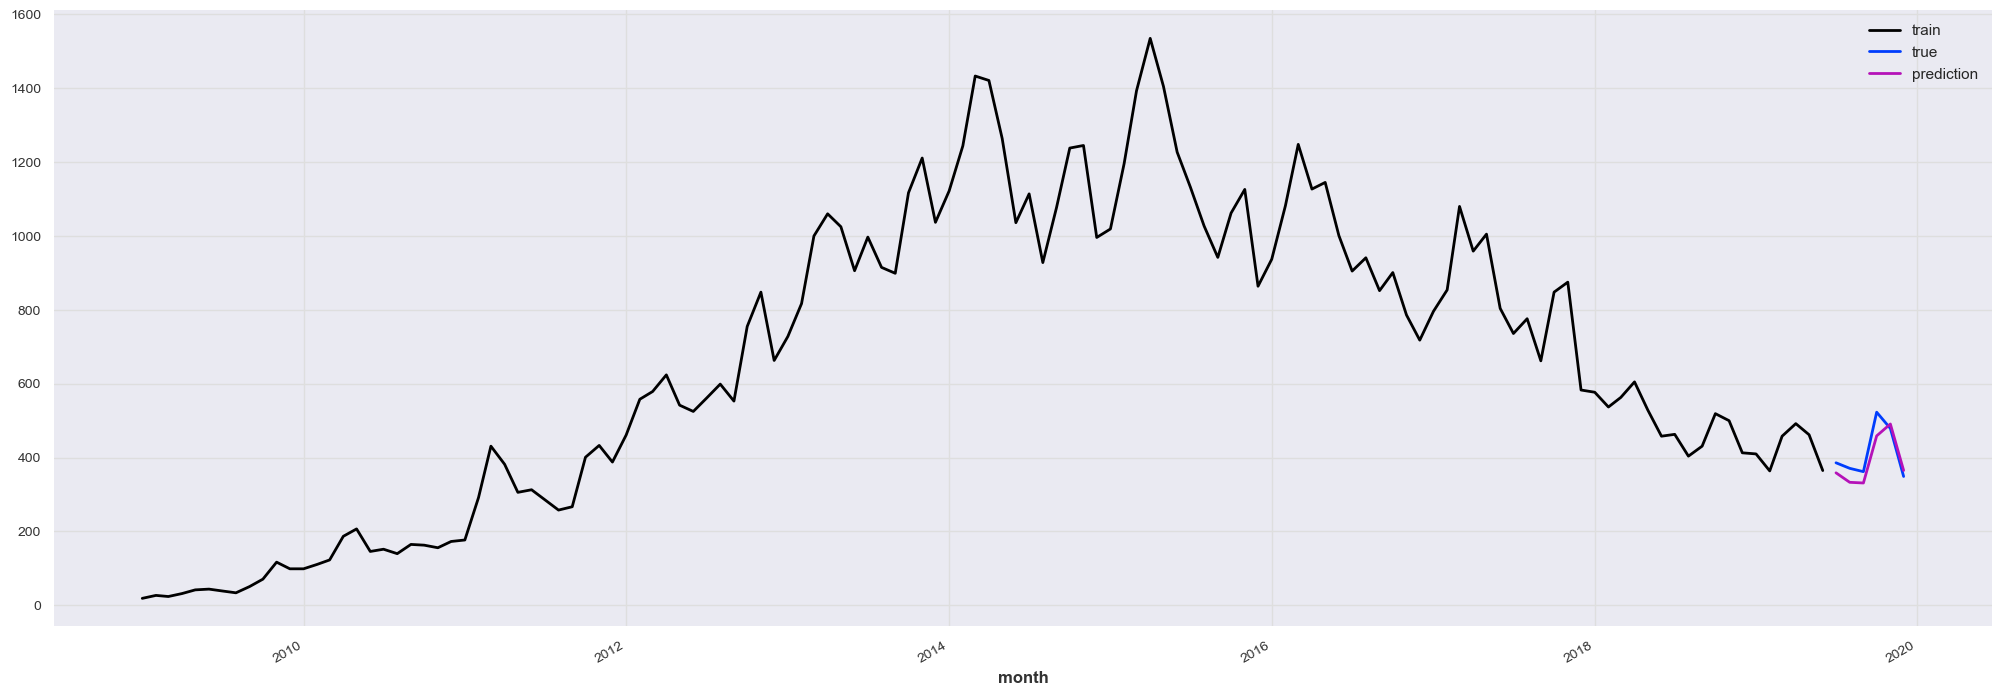

In [76]:
traincomp.plot(label="train")
test.plot(label="true")
pred_best_theta.plot(label="prediction")

PREDICCIÓN DE LA SERIE TEMPORAL CON EL MODELO TBATS

In [78]:
from sktime.forecasting.tbats import TBATS # MODELO TBATS
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series

In [79]:
forecaster = TBATS(  
    use_box_cox=None,
    use_trend=None,
    use_damped_trend=None,
    sp=12,
    use_arma_errors=True,
    n_jobs=1)
forecaster.fit(y_train)  

TBATS(n_jobs=1, sp=12)

In [80]:
TBATS_pred = forecaster.predict(fh)

In [81]:
#MAPE
mean_absolute_percentage_error(y_validation, TBATS_pred[0:12])

0.18832793717340637

In [82]:
#MSE
mse = MeanSquaredError()
mse(y_validation, TBATS_pred[0:12])

8184.926038169091

In [83]:
#RMSE
rmse = MeanSquaredError(square_root=True)
rmse(y_validation, np.exp(TBATS_pred))

inf

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='matlab'>)

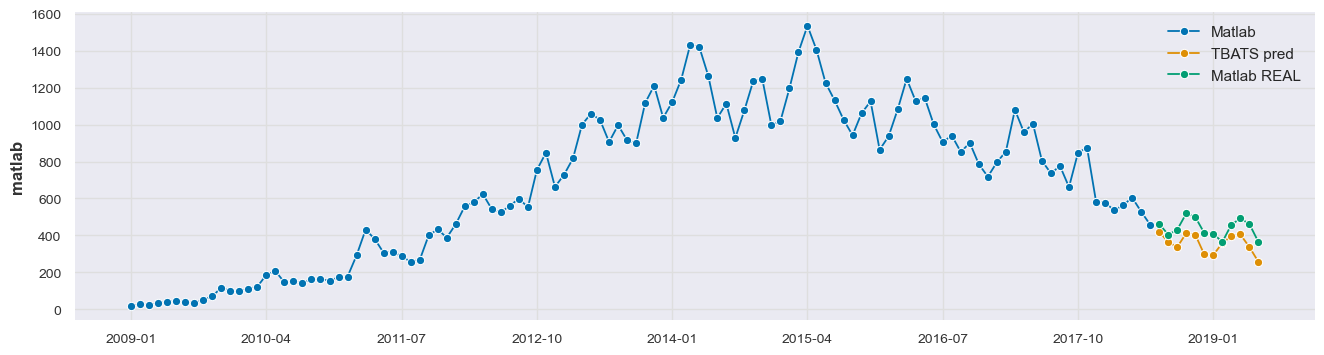

In [84]:
plot_series(y_train, TBATS_pred ,y_validation, labels=["Matlab", "TBATS pred", "Matlab REAL"])

In [85]:
forecaster = TBATS(  
    use_box_cox=None,
    use_trend=None,
    use_damped_trend=None,
    sp=12,
    use_arma_errors=True,
    n_jobs=1)
forecaster.fit(y_traincomp)  

TBATS(n_jobs=1, sp=12)

In [86]:
TBATS_pred = forecaster.predict(fh_6)

In [87]:
#MAPE
mean_absolute_percentage_error(y_test, TBATS_pred[0:6])

0.2330709181640139

In [88]:
#MSE
mse = MeanSquaredError()
mse(y_test, TBATS_pred[0:6])

11208.344133999519

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='matlab'>)

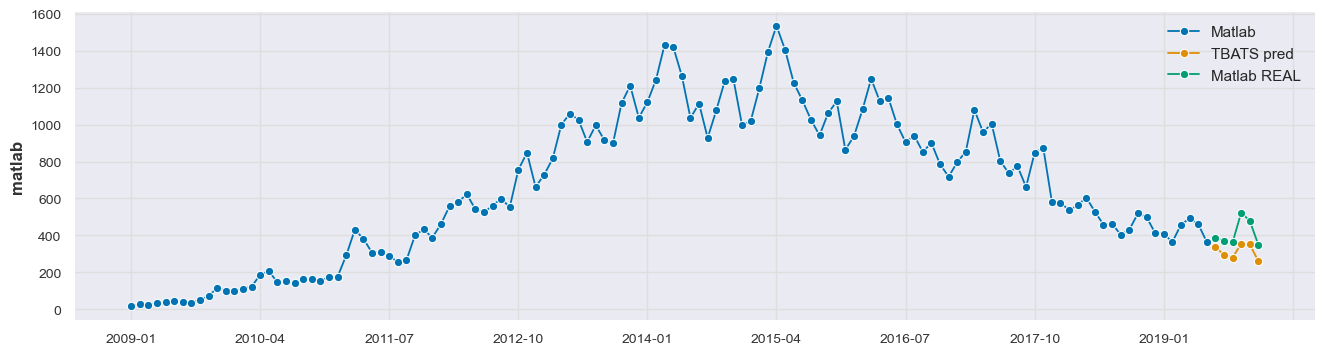

In [89]:
plot_series(y_traincomp, TBATS_pred ,y_test, labels=["Matlab", "TBATS pred", "Matlab REAL"])

In [ ]:
Estos son los diferentes errores medios que hemos obtenido en los modelos:
    
    ETS: 8.9%
    ARIMA:23,8%
    THETA:18,8%
    TBATS: 23,3%

Por lo que escogemos el modelo ETS ( menor error) para realizar la predicción a 12 meses de nuestra serie temporal

PREDICCIÓN A 12 MESES FUERA DE LA MUESTRA USANDO EL MODELO ETS

In [93]:
ETS_auto_model.fit(df["matlab"].astype("float64").to_period("M"))

AutoETS(auto=True, n_jobs=-1, sp=4)

In [94]:
print(ETS_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -756.193
Date:                Mon, 06 Nov 2023   AIC                           1532.386
Time:                        12:42:18   BIC                           1561.214
Sample:                    01-31-2009   HQIC                          1544.101
                         - 12-31-2019   Scale                            0.024
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.100     10.025      0.000       0.804       1.195
smoothing_trend     9.999e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [95]:
#Predicciones MODELO ETS
ETS_pred = ETS_auto_model.predict(fh)
print(ETS_pred)

2020-01    348.759250
2020-02    382.143154
2020-03    406.792716
2020-04    382.628397
2020-05    381.563519
2020-06    417.261699
2020-07    443.336935
2020-08    416.246788
2020-09    414.367788
2020-10    452.380243
2020-11    479.881154
2020-12    449.865178
Freq: M, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

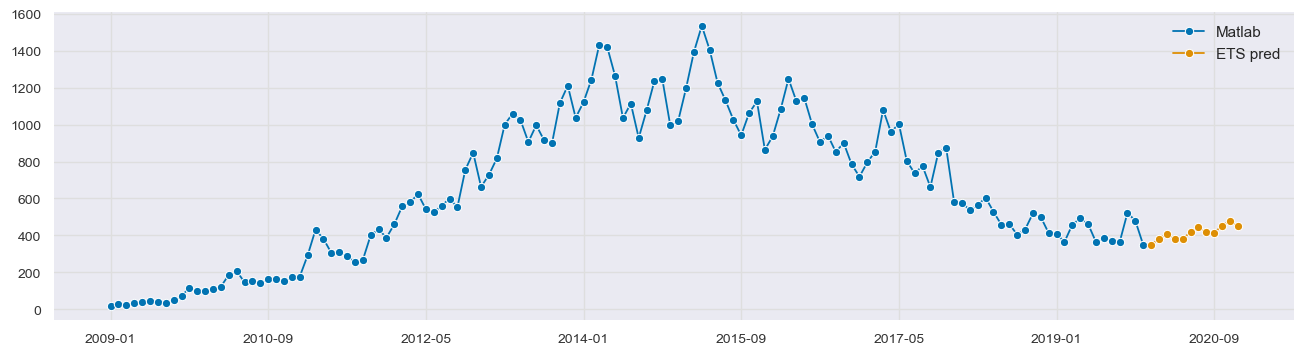

In [97]:
#GRAFICAMOS EL TRAIN, LA PREDICCIÓN Y LA VALIDACIÓN
plot_series(df["matlab"].astype("float64").to_period("M"), ETS_pred, labels=["Matlab", "ETS pred"])